In [1]:
import os
import vtk
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sympy import per
from utils.append_df_to_excel import append_df_to_excel
from splot.esda import plot_moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from scipy.spatial.distance import pdist, squareform
from libpysal.weights import DistanceBand
from esda.moran import Moran
from pysal.lib import weights
from splot.esda import moran_scatterplot
from pymskt.mesh import Mesh, BoneMesh
from vtk.util.numpy_support import numpy_to_vtk, vtk_to_numpy
from utils.append_df_to_excel import append_df_to_excel
from pymskt.mesh.meshTools import smooth_scalars_from_second_mesh_onto_base, transfer_mesh_scalars_get_weighted_average_n_closest

/dataNAS/people/anoopai/miniconda3/envs/knee_pipeline/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.4-CAPI-1.17.4) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
dir_path = '/dataNAS/people/anoopai/DESS_ACL_study'
code_dir_path = '/dataNAS/people/anoopai/KneePipeline/'
data_path = os.path.join(dir_path, 'data')
log_path = '/dataNAS/people/anoopai/KneePipeline/logs'
log_file_path = os.path.join(log_path, f'pipeline_DESS_errors.txt')
mean_path = os.path.join(code_dir_path, 'mean_data')
save_path = os.path.join(mean_path, f't2_and_thickness_change_graft')
data_path = os.path.join(mean_path, 'spatial_autocorrelation_sensitivity_analysis.xlsx')

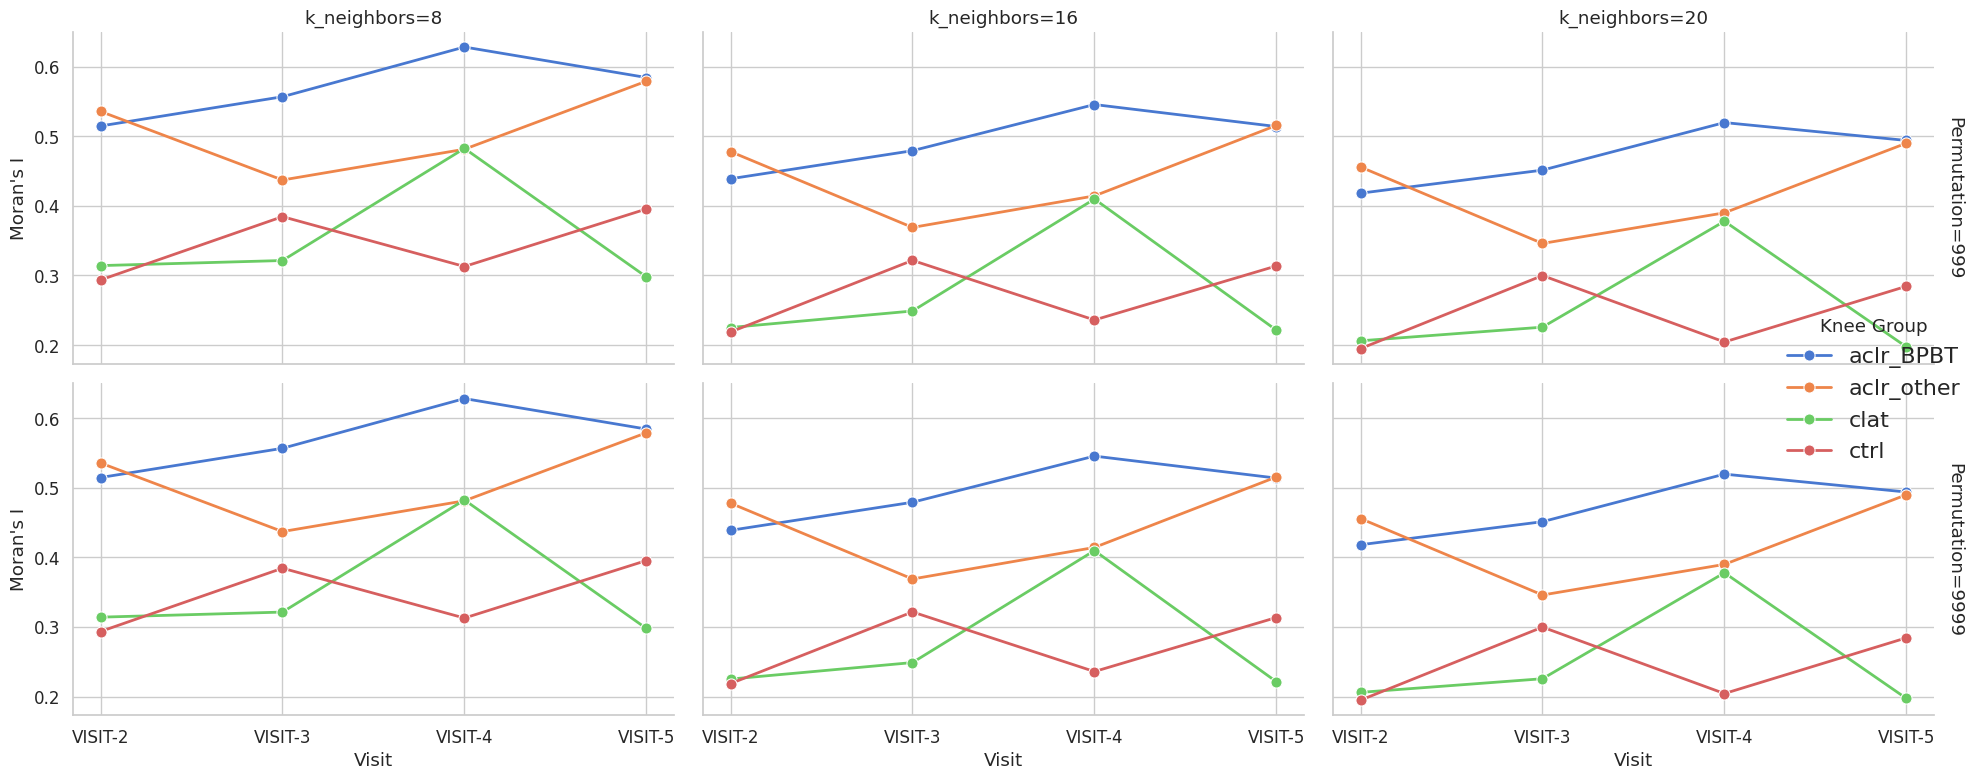

In [3]:
import pandas as pd
from pyparsing import line
import seaborn as sns
import matplotlib.pyplot as plt

sheet = 'Diff_T2_mean_filt_all'
# sheet = 'spearman_r'
sheet = 'Diff_thickness_all'

data = pd.read_excel(data_path, sheet_name=sheet)

# Clean and convert permutation to int (remove commas)
data['permutation'] = data['permutation'].astype(str).str.replace(',', '').astype(int)

# Optional: Ensure correct sorting
visit_order = ['VISIT-2', 'VISIT-3', 'VISIT-4', 'VISIT-5']
data['visit'] = pd.Categorical(data['visit'], categories=visit_order, ordered=True)

# Set a color palette
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

# Plot: Moran's I over visits, one subplot per k_neighbors
g = sns.FacetGrid(data, col='k_neighbors', hue='knee', row='permutation',
                  margin_titles=True, sharey=True, sharex=True, height=4, aspect=1.5)

g.map(sns.lineplot, 'visit', 'moran_I', marker='o', linewidth=2, markersize=8)

# Add titles and clean layout
g.set_titles(row_template='Permutation={row_name}', col_template='k_neighbors={col_name}')
g.set_axis_labels('Visit', "Moran's I")
g.add_legend(title='Knee Group', fontsize=16)
plt.tight_layout()
plt.show()
